# Coursera - IBM - Applied Data Science Capstone

## The Battle of Neighborhoods (Week 2)

### by: Josemar Tadeu Migowski - October 2019

### Importing the necessary libraries:

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize
import folium
from geopy.geocoders import Nominatim
import requests
import json
from geojson import Feature, FeatureCollection, Point

# Configuring Foursquare credentials API

In [2]:
CLIENT_ID = 'P2WZUZATAF40IQNFOYMNLKM2333BRFVWD3CLDOEHAMWFUBJV'
CLIENT_SECRET = 'WHGNAVSWULWYI1ACJVBWG3BX2LUQ5YD5I1E0YM5DAQGYS4AA'
VERSION = '20180604'
LIMIT = 2000
RADIUS = 1500

### Obtaining information regarding urban densities in the Administrative Regions of the Federal District

site: http://www.codeplan.df.gov.br/wp-content/uploads/2018/02/TD_22_Densidades_Urbanas_nas_Regi%C3%B5es_Administrativas_DF.pdf

In [3]:
Densidade_DF = pd.read_csv('densidade.csv',sep=';',encoding='utf-8')

In [4]:
Densidade_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
num_ra                                 31 non-null object
Nome                                   31 non-null object
População 2013                         31 non-null int64
População2015/16                       31 non-null int64
TMGCA(%)                               31 non-null float64
Área Ocupada Urbana (Ha)               31 non-null float64
Densidade Urbana 2015(hab/ha)          31 non-null float64
Área Total da RA (em ha)               31 non-null float64
Densidade Demográfica 2015 (hab/ha)    31 non-null float64
Casas (%)                              31 non-null float64
Apt+Quit (%)                           31 non-null object
dtypes: float64(6), int64(2), object(3)
memory usage: 2.8+ KB


In [5]:
Densidade_DF

,num_ra,Nome,População 2013,População2015/16,TMGCA(%),Área Ocupada Urbana (Ha),Densidade Urbana 2015(hab/ha),Área Total da RA (em ha),Densidade Demográfica 2015 (hab/ha),Casas (%),Apt+Quit (%)
0,XXIII,Varjão,9292,8453,-4.62,59.42,142.27,75.56,111.87,75.75,20.44
1,XIX,Candangolândia,16886,15641,-3.76,113.85,137.38,662.70,23.60,87.20,12
2,IX,Ceilândia,451872,479713,3.03,3691.92,129.94,23401.14,20.50,94.36,4.25
3,XV,Recanto das Emas,138997,146906,2.81,1246.27,117.88,10261.11,14.32,96.98,2.76
4,XIV,São Sebastião,98908,99525,0.31,882.69,112.75,35571.37,2.80,92.71,6.61
5,XXV,SCIA/Estrutural,35094,38429,4.64,350.21,109.73,741.75,51.81,92.40,0.6
6,XXII,Sudoeste/Octogonal,52273,52990,0.68,505.80,104.77,585.61,90.49,0.11,99.89
7,XII,Samambaia,228356,258457,6.39,2501.67,103.31,10125.85,25.52,89.29,10.49
8,XI,Cruzeiro,32182,29535,-4.20,290.60,101.63,323.05,91.43,22.80,77.2
9,IV,Brazlândia,51121,51816,0.68,554.03,93.52,47684.84,1.09,89.85,7.4


### Shapefile with DF Administrative Region boundary definitions:

site: http://dados.gov.br/dataset/dados-georreferenciados-siturb-segeth/resource/c5898ba4-d1a4-49fb-9075-60f6dda74097

In [6]:
ragdf = gpd.read_file('./RegioesAdministrativasDF/Proposta Regi├╡es Administrativas.shp')

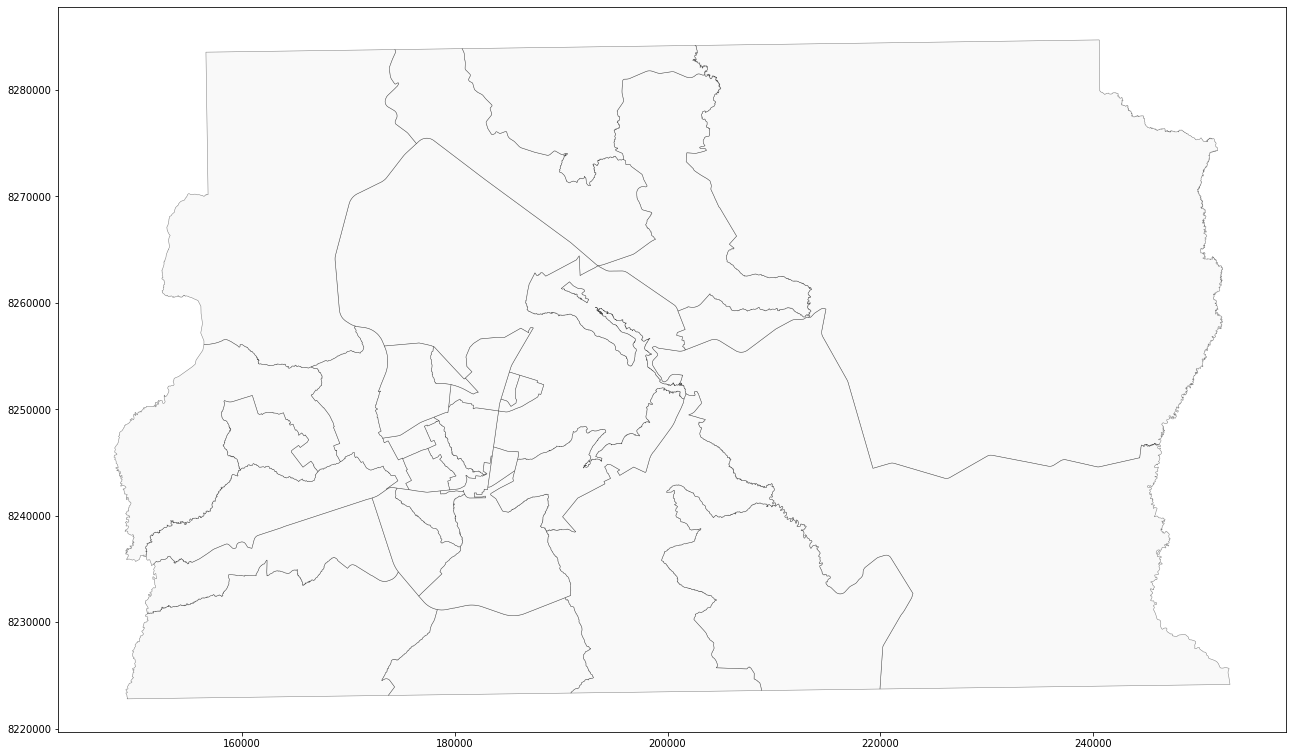

In [7]:
ragdf.plot(figsize=(22, 18),color = "whitesmoke", alpha=0.5, edgecolor='black',linewidth = 0.5)

### GeoPandas DataFrame of DF Administrative Regions:

In [8]:
ragdf

,ra_num,ra,num_ra,link,shape_leng,st_area_sh,st_length_,geometry
0,1.0,Plano Piloto,I,https://www.geoportal.seduh.df.gov.br/static/m...,184204.574473,4.372014e+08,184204.574473,"POLYGON ((193478.148 8263481.141, 193477.162 8..."
1,2.0,Gama,II,https://www.geoportal.seduh.df.gov.br/static/m...,88897.980244,2.760534e+08,88897.980244,"POLYGON ((174717.482 8234729.908, 174835.804 8..."
2,4.0,Brazlândia,IV,https://www.geoportal.seduh.df.gov.br/static/m...,107050.466657,4.701836e+08,107050.466657,"POLYGON ((156150.499 8257172.998, 156196.454 8..."
3,5.0,Sobradinho,V,https://www.geoportal.seduh.df.gov.br/static/m...,102972.805688,1.935265e+08,102972.805688,"POLYGON ((203513.962 8281431.436, 203513.986 8..."
4,6.0,Planaltina,VI,https://www.geoportal.seduh.df.gov.br/static/m...,228787.515933,1.531401e+09,228787.515933,"POLYGON ((240552.975 8284705.234, 240583.535 8..."
5,7.0,Paranoá,VII,https://www.geoportal.seduh.df.gov.br/static/m...,215012.822589,8.312098e+08,215012.822589,"POLYGON ((214739.172 8258683.409, 214710.678 8..."
6,10.0,Guará,X,https://www.geoportal.seduh.df.gov.br/static/m...,24813.097261,2.522335e+07,24813.097261,"POLYGON ((181753.946 8250237.152, 181748.876 8..."
7,12.0,Samambaia,XII,https://www.geoportal.seduh.df.gov.br/static/m...,71223.324610,9.999229e+07,71223.324610,"POLYGON ((173592.478 8244234.280, 173592.778 8..."
8,13.0,Santa Maria,XIII,https://www.geoportal.seduh.df.gov.br/static/m...,54220.965466,1.315831e+08,54220.965466,"POLYGON ((190476.860 8232091.940, 190489.180 8..."
9,14.0,São Sebastião,XIV,https://www.geoportal.seduh.df.gov.br/static/m...,100738.242604,2.627052e+08,100738.242604,"POLYGON ((201111.600 8242884.870, 201192.650 8..."


### Geopandas map adjustments to include Administrative Region names:

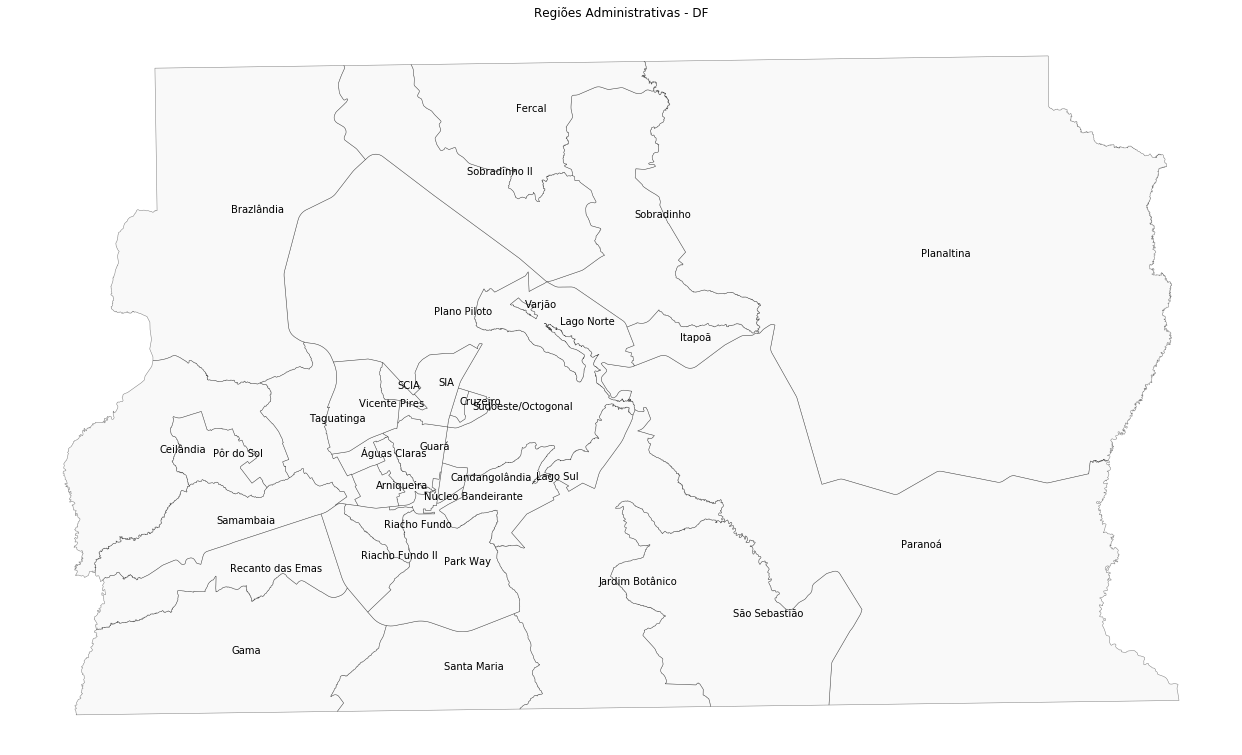

In [9]:
ragdf["center"] = ragdf["geometry"].centroid
ragdf_points = ragdf.copy()
ragdf_points.set_geometry("center", inplace = True)
ax = ragdf.plot(figsize=(22, 18),color = "whitesmoke", alpha=0.5, edgecolor='black',linewidth = 0.5)
texts = []
for x, y, label in zip(ragdf_points.geometry.x, ragdf_points.geometry.y, ragdf_points["ra"]):
    texts.append(plt.text(x, y, label, fontsize = 10))
ax.set_title('Regiões Administrativas - DF')
ax.set_axis_off()

### DF Administrative Regions DataFrame with central point marking of each RA:

In [10]:
ragdf

,ra_num,ra,num_ra,link,shape_leng,st_area_sh,st_length_,geometry,center
0,1.0,Plano Piloto,I,https://www.geoportal.seduh.df.gov.br/static/m...,184204.574473,4.372014e+08,184204.574473,"POLYGON ((193478.148 8263481.141, 193477.162 8...",POINT (182864.551 8260433.709)
1,2.0,Gama,II,https://www.geoportal.seduh.df.gov.br/static/m...,88897.980244,2.760534e+08,88897.980244,"POLYGON ((174717.482 8234729.908, 174835.804 8...",POINT (163796.322 8228531.595)
2,4.0,Brazlândia,IV,https://www.geoportal.seduh.df.gov.br/static/m...,107050.466657,4.701836e+08,107050.466657,"POLYGON ((156150.499 8257172.998, 156196.454 8...",POINT (163814.577 8269927.154)
3,5.0,Sobradinho,V,https://www.geoportal.seduh.df.gov.br/static/m...,102972.805688,1.935265e+08,102972.805688,"POLYGON ((203513.962 8281431.436, 203513.986 8...",POINT (201689.520 8269503.396)
4,6.0,Planaltina,VI,https://www.geoportal.seduh.df.gov.br/static/m...,228787.515933,1.531401e+09,228787.515933,"POLYGON ((240552.975 8284705.234, 240583.535 8...",POINT (228573.880 8265867.938)
5,7.0,Paranoá,VII,https://www.geoportal.seduh.df.gov.br/static/m...,215012.822589,8.312098e+08,215012.822589,"POLYGON ((214739.172 8258683.409, 214710.678 8...",POINT (226702.960 8238536.919)
6,10.0,Guará,X,https://www.geoportal.seduh.df.gov.br/static/m...,24813.097261,2.522335e+07,24813.097261,"POLYGON ((181753.946 8250237.152, 181748.876 8...",POINT (181481.362 8247720.625)
7,12.0,Samambaia,XII,https://www.geoportal.seduh.df.gov.br/static/m...,71223.324610,9.999229e+07,71223.324610,"POLYGON ((173592.478 8244234.280, 173592.778 8...",POINT (162363.660 8240788.584)
8,13.0,Santa Maria,XIII,https://www.geoportal.seduh.df.gov.br/static/m...,54220.965466,1.315831e+08,54220.965466,"POLYGON ((190476.860 8232091.940, 190489.180 8...",POINT (183816.034 8227022.374)
9,14.0,São Sebastião,XIV,https://www.geoportal.seduh.df.gov.br/static/m...,100738.242604,2.627052e+08,100738.242604,"POLYGON ((201111.600 8242884.870, 201192.650 8...",POINT (210963.398 8232027.032)


### Getting Wikipedia data from Income per Capita by DF Administrative Region:

In [11]:
url2 = 'https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_administrativas_do_Distrito_Federal_por_renda_per_capita'
renda_df = pd.read_html(url2, decimal=',',thousands='.')
renda_df = renda_df[0]
renda_df = renda_df.rename(columns={'Região administrativa':'ra'})
renda_df.head()

,Posição,ra,Renda per capita
0,1,Lago Sul,8317.4
1,2,Sudoeste/Octogonal,7073.7
2,3,Plano Piloto,6778.0
3,4,Lago Norte,6362.3
4,5,Park Way,5902.9


### Insert columns "Longitude" and "Latitude" on geopandas dataframe:

In [16]:
ragdf['Longitude'] = ragdf.geometry.centroid.x
ragdf['Latitude'] = ragdf.geometry.centroid.y
print(ragdf['geometry'].crs)
teste1 = ragdf
teste1['geometry'] = ragdf['geometry'].to_crs(epsg=4326)
print(teste1['geometry'].crs)
teste1.head()

{'init': 'epsg:31983'}
{'init': 'epsg:31983'}


,ra_num,ra,num_ra,link,shape_leng,st_area_sh,st_length_,geometry,center,Longitude,Latitude
0,1.0,Plano Piloto,I,https://www.geoportal.seduh.df.gov.br/static/m...,184204.574473,4.372014e+08,184204.574473,"POLYGON ((-135.23474 -85.52569, -135.23474 -85...",POINT (182864.551 8260433.709),-47.958782,-15.714441
1,2.0,Gama,II,https://www.geoportal.seduh.df.gov.br/static/m...,88897.980244,2.760534e+08,88897.980244,"POLYGON ((-135.23476 -85.52569, -135.23476 -85...",POINT (163796.322 8228531.595),-48.140983,-15.999901
2,4.0,Brazlândia,IV,https://www.geoportal.seduh.df.gov.br/static/m...,107050.466657,4.701836e+08,107050.466657,"POLYGON ((-135.23474 -85.52568, -135.23474 -85...",POINT (163814.577 8269927.154),-48.135062,-15.626260
3,5.0,Sobradinho,V,https://www.geoportal.seduh.df.gov.br/static/m...,102972.805688,1.935265e+08,102972.805688,"POLYGON ((-135.23472 -85.52569, -135.23472 -85...",POINT (201689.520 8269503.396),-47.782217,-15.634853
4,6.0,Planaltina,VI,https://www.geoportal.seduh.df.gov.br/static/m...,228787.515933,1.531401e+09,228787.515933,"POLYGON ((-135.23471 -85.52569, -135.23472 -85...",POINT (228573.880 8265867.938),-47.532036,-15.670708


In [17]:
# Merge dataframes
lat_log_list = ragdf[['ra','Longitude','Latitude']]
lat_log_list = pd.merge(lat_log_list, renda_df, on='ra')
lat_log_list

,ra,Longitude,Latitude,Posição,Renda per capita
0,Plano Piloto,-47.958782,-15.714441,3,6778.0
1,Gama,-48.140983,-15.999901,16,1596.4
2,Brazlândia,-48.135062,-15.626260,21,1118.9
3,Sobradinho,-47.782217,-15.634853,15,2192.3
4,Planaltina,-47.532036,-15.670708,20,1140.2
5,Paranoá,-47.552538,-15.917338,28,826.8
6,Guará,-47.973383,-15.829029,10,3642.6
7,Samambaia,-48.152634,-15.889076,23,99230.0
8,Santa Maria,-47.954339,-16.016189,24,977.0
9,São Sebastião,-47.700278,-15.974347,18,1351.2


# Searching for Venues Information with the Foursquare API:

## Foursquare API searches will be conducted for each Administrative Region of the Federal District

In [18]:
columns_name = ['id', 'Name', 'Latitude', 'Longitude', 'Categorie_name','ra']
nearby_venues = pd.DataFrame(columns=columns_name)
for index, row in lat_log_list.iterrows():
    print(index,row['ra'],row['Longitude'],row['Latitude'])
    ra = row['ra']
    URL = 'https://api.foursquare.com/v2/venues/search?intent=browse&client_id={}\
    &client_secret={}\
    &v={}&ll={},{}\
    &radius={}&\
    limit={}'.format(\
                   CLIENT_ID,\
                   CLIENT_SECRET,\
                   VERSION,\
                   float(row['Latitude']),\
                   float(row['Longitude']),\
                   3000,\
                   50)
    result = requests.get(URL).json()
    venues = result['response']['venues']
    for x in range(len(venues)):
        df_temp = venues[x]
        if len(df_temp['categories']) > 0:
            categorie_name = df_temp['categories'][0]['name']
        else:
            categorie_name = 'Não Informado'
        nearby_venues = nearby_venues.append({'id': df_temp['id'],\
                                              'Name': df_temp['name'],\
                                              'Latitude': df_temp['location']['lat'],\
                                              'Longitude': df_temp['location']['lng'],\
                                              'Categorie_name': categorie_name,\
                                              'ra': ra},ignore_index=True)

0 Plano Piloto -47.95878210139519 -15.714440663638443
1 Gama -48.14098322099339 -15.999901313821143
2 Brazlândia -48.135062094607115 -15.626259548368463
3 Sobradinho -47.782216793713665 -15.63485251310192
4 Planaltina -47.53203556308109 -15.670707542655371
5 Paranoá -47.55253845476664 -15.917337756045992
6 Guará -47.973383126250766 -15.829028594444559
7 Samambaia -48.152633938492045 -15.889076197152397
8 Santa Maria -47.95433869502863 -16.016189332771827
9 São Sebastião -47.70027812604116 -15.97434741723731
10 Park Way -47.953064476565764 -15.927288626705591
11 Sobradinho II -47.92870007878245 -15.59613070378277
12 Jardim Botânico -47.81763745839281 -15.945423464265456
13 Águas Claras -48.0246025978681 -15.834096206315829
14 Ceilândia -48.20138110813726 -15.828103738415821
15 Fercal -47.88451333554014 -15.543465706614558
16 Taguatinga -48.070055131228024 -15.803703082922995
17 Núcleo Bandeirante -47.969779597697354 -15.87176799043519
18 Cruzeiro -47.93744795014466 -15.791642828462319
1

### Viewing information about the DataFrame created from FourSquare API search results:

In [19]:
nearby_venues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 6 columns):
id                930 non-null object
Name              930 non-null object
Latitude          930 non-null float64
Longitude         930 non-null float64
Categorie_name    930 non-null object
ra                930 non-null object
dtypes: float64(2), object(4)
memory usage: 43.7+ KB


### Creating a Venues Category Summary DataFrame:

In [20]:
Categories_df = pd.DataFrame(nearby_venues.Categorie_name.value_counts())

### Presenting the quantitative of the top 20 categories found in the survey:

In [21]:
Categories_df.head(20)

,Categorie_name
Church,43
Other Great Outdoors,43
Housing Development,39
Salon / Barbershop,35
General Entertainment,32
Factory,23
Residential Building (Apartment / Condo),23
Farm,22
Não Informado,21
Office,18
